#                            Machine Learning Project - Churn Modeling


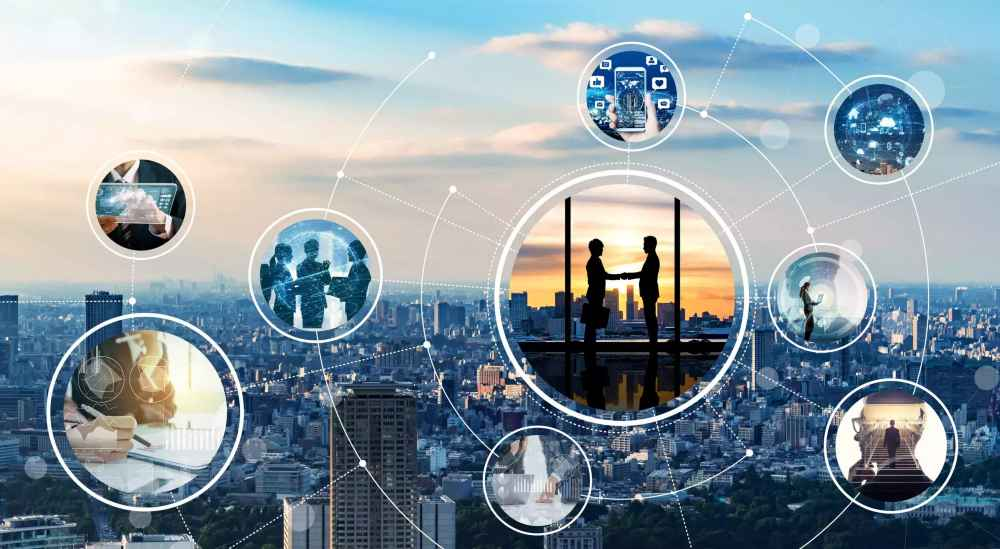

                                        Telecom Company Case Study

# Problem Statement

You have been assigned the task to build for this Telecom company a Logistic Regression Machine Learning model that predicts which of their customers are likely to churn (stop using their service in future). For more details on the intermediate and final outputs expected, refer to the list of deliverables mentioned in the “Model Building” and “Model Validation” sections below.


# Business Objective :

Customer churn is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on the revenues. Companies often seek to know which customers are likely to churn in the recent future so that a timely action could be taken to prevent it


# Dataset :

# Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.model_selection import cross_val_score


# Reading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\SONY\Downloads\1704773617problemstatement\Dataset.csv")


# Overview of the dataset

# View the first and last 5 rows of the dataset

In [3]:
data.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

In [4]:
data.tail()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7

# Understand the shape of the dataset.

In [5]:
data.shape

(3333, 11)

* The dataset has 3333 rows and 11 columns of data

# Check the data types of the columns for the dataset.

In [6]:
# Explore data and check for missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None


**Observations -**
* There are no null values in the dataset.

In [7]:
# Explore data and check for missing values
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Summary of the dataset

In [8]:
data.describe().T


count        mean        std   min     25%     50%     75%  \
Churn            3333.0    0.144914   0.352067   0.0    0.00    0.00    0.00   
AccountWeeks     3333.0  101.064806  39.822106   1.0   74.00  101.00  127.00   
ContractRenewal  3333.0    0.903090   0.295879   0.0    1.00    1.00    1.00   
DataPlan         3333.0    0.276628   0.447398   0.0    0.00    0.00    1.00   
DataUsage        3333.0    0.816475   1.272668   0.0    0.00    0.00    1.78   
CustServCalls    3333.0    1.562856   1.315491   0.0    1.00    1.00    2.00   
DayMins          3333.0  179.775098  54.467389   0.0  143.70  179.40  216.40   
DayCalls         3333.0  100.435644  20.069084   0.0   87.00  101.00  114.00   
MonthlyCharge    3333.0   56.305161  16.426032  14.0   45.00   53.50   66.20   
OverageFee       3333.0   10.051488   2.535712   0.0    8.33   10.07   11.77   
RoamMins         3333.0   10.237294   2.791840   0.0    8.50   10.30   12.10   

                    max  
Churn              1.00  
AccountWeeks     243.00  
ContractRenewal    1.00  
DataPlan           1.00  
DataUsage          5.40  
CustServCalls      9.00  
DayMins          350.80  
DayCalls         165.00  
MonthlyCharge    111.30  
OverageFee        18.19  
RoamMins          20.00

* The majority of observations for the "Churn" variable are 0 (indicating no churn), as the median and 75% values are both 0. The mean is relatively low at 0.144914, indicating a lower overall prevalence of churn in the dataset..

# Exploratory Data Analysis (EDA) Summary

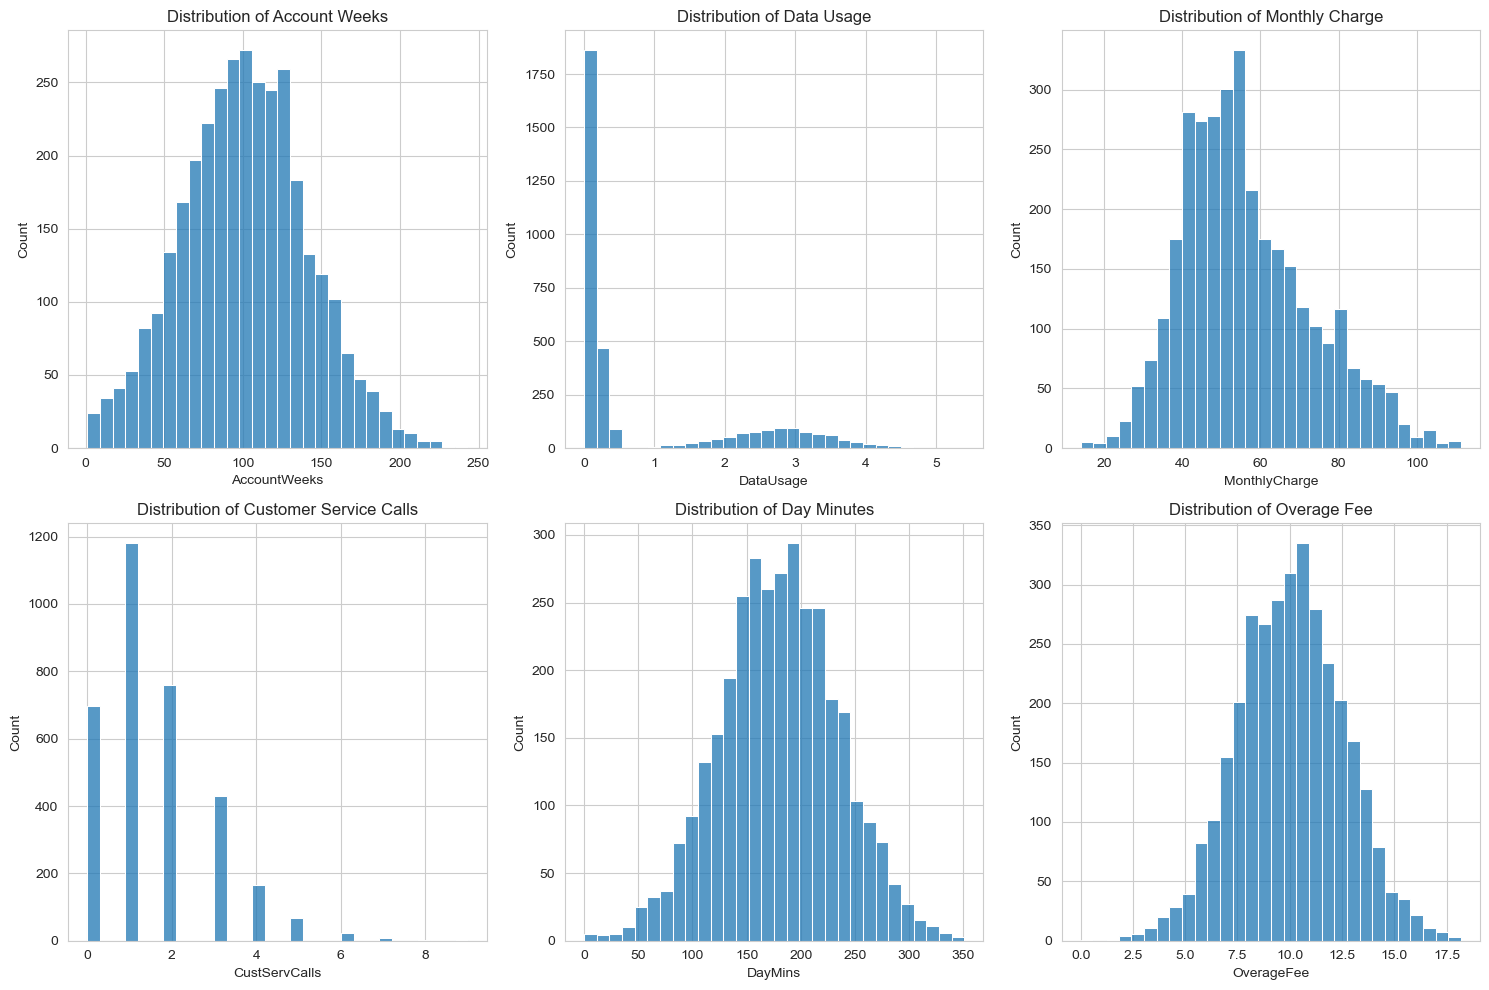

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot distributions of numeric features
plt.figure(figsize=(15, 10))

# Plot distribution of 'AccountWeeks'
plt.subplot(2, 3, 1)
sns.histplot(data['AccountWeeks'], kde=False, bins=30)
plt.title('Distribution of Account Weeks')

# Plot distribution of 'DataUsage'
plt.subplot(2, 3, 2)
sns.histplot(data['DataUsage'], kde=False, bins=30)
plt.title('Distribution of Data Usage')

# Plot distribution of 'MonthlyCharge'
plt.subplot(2, 3, 3)
sns.histplot(data['MonthlyCharge'], kde=False, bins=30)
plt.title('Distribution of Monthly Charge')

# Plot distribution of 'CustServCalls'
plt.subplot(2, 3, 4)
sns.histplot(data['CustServCalls'], kde=False, bins=30)
plt.title('Distribution of Customer Service Calls')

# Plot distribution of 'DayMins'
plt.subplot(2, 3, 5)
sns.histplot(data['DayMins'], kde=False, bins=30)
plt.title('Distribution of Day Minutes')

# Plot distribution of 'OverageFee'
plt.subplot(2, 3, 6)
sns.histplot(data['OverageFee'], kde=False, bins=30)
plt.title('Distribution of Overage Fee')

# Show the plots
plt.tight_layout()
plt.show()

# Bivariate Analysis

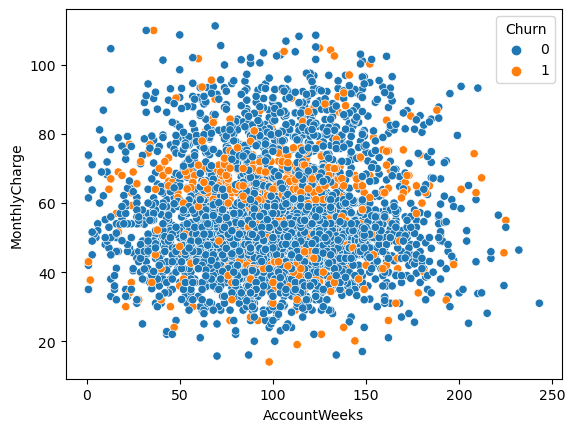

In [9]:
sns.scatterplot(x="AccountWeeks", y="MonthlyCharge", hue="Churn", data=data)
plt.show()

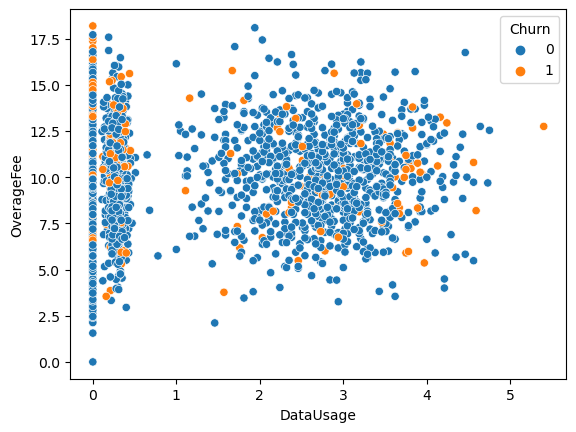

In [10]:
sns.scatterplot(x="DataUsage", y="OverageFee", hue="Churn", data=data)
plt.show()

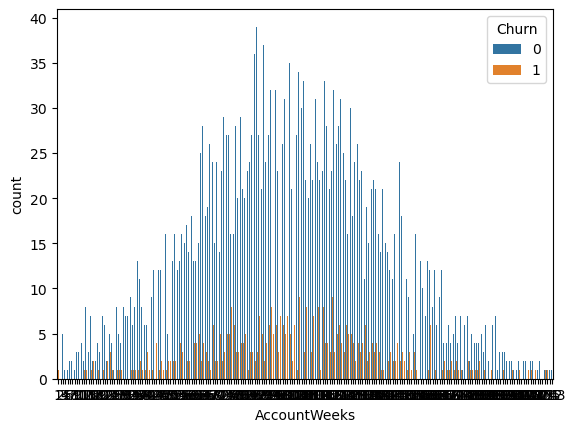

In [11]:
# Bar plot for AccountWeeks
sns.countplot(x='AccountWeeks', hue='Churn', data=data)
plt.show()

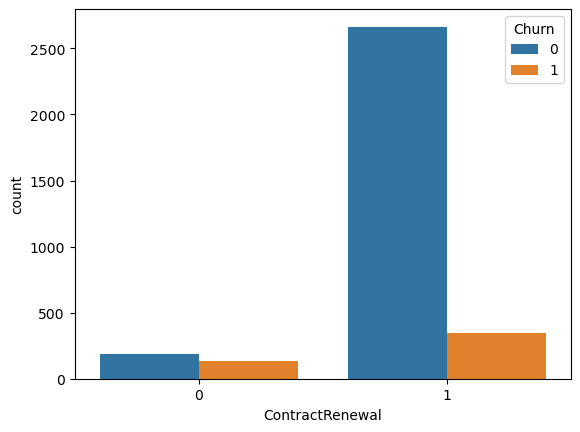

In [12]:
# Bar plot for ContractRenewal
sns.countplot(x='ContractRenewal', hue='Churn', data=data)
plt.show()

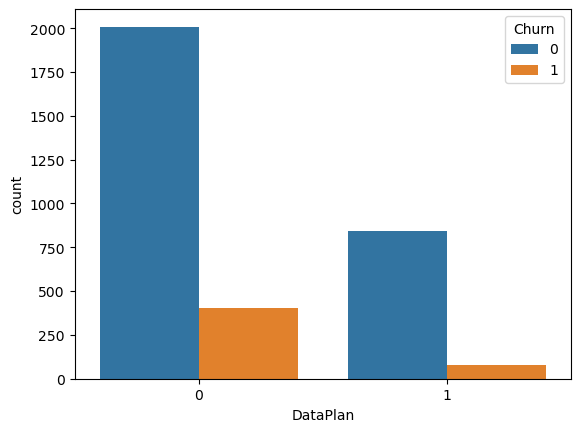

In [13]:
# Bar plot for DataPlan
sns.countplot(x='DataPlan', hue='Churn', data=data)
plt.show()

Correlation check

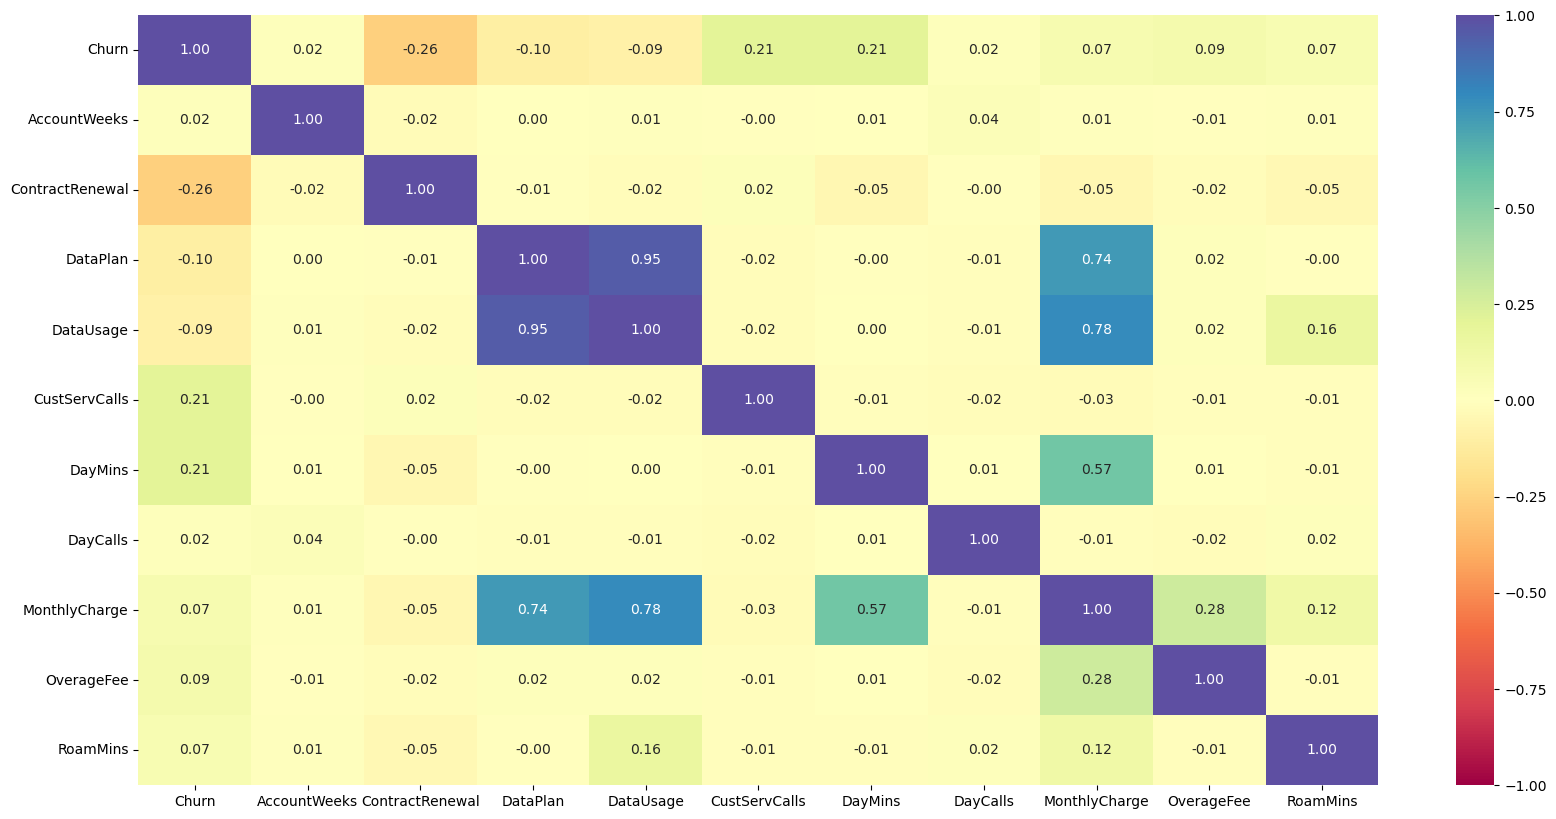

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

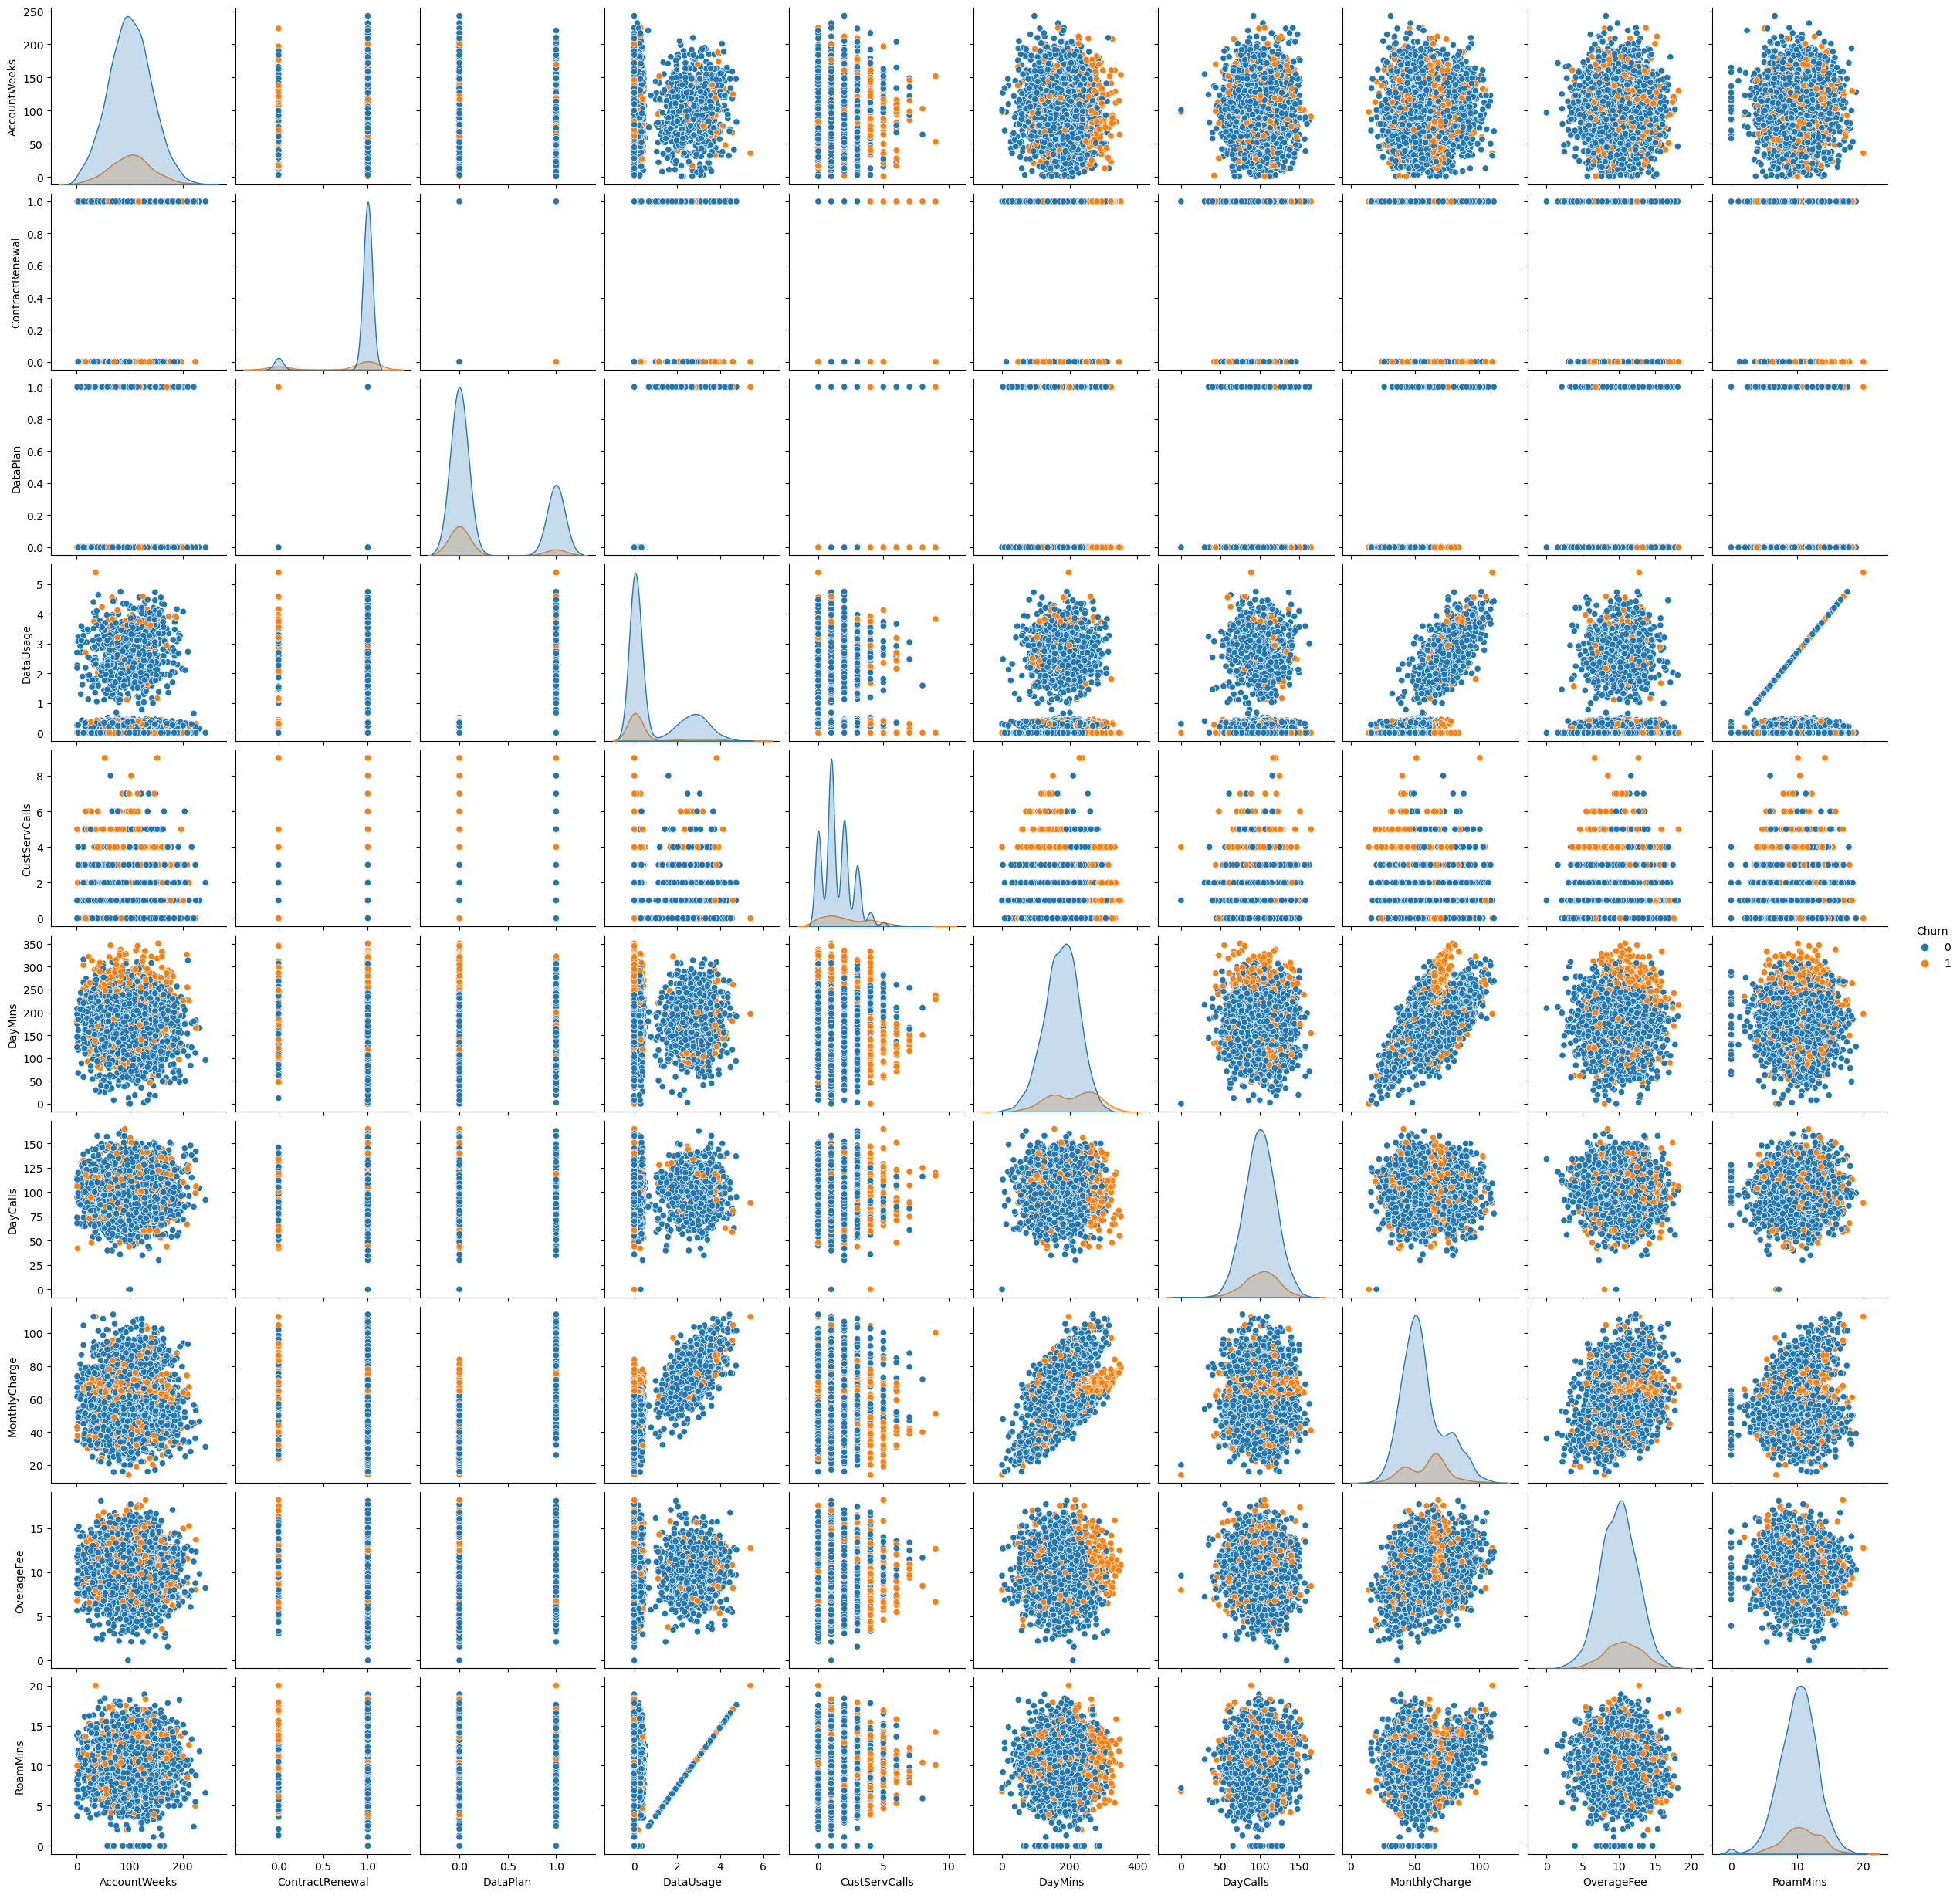

In [15]:
# Bi-variate plots
sns.pairplot(data, hue="Churn", diag_kind='kde')
plt.show()

# Data Preparataion for model building

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [32]:
# Split the data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']
X
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 10) (667, 10) (2666,) (667,)


In [34]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [36]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [37]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Model Building

# Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [38]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [39]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

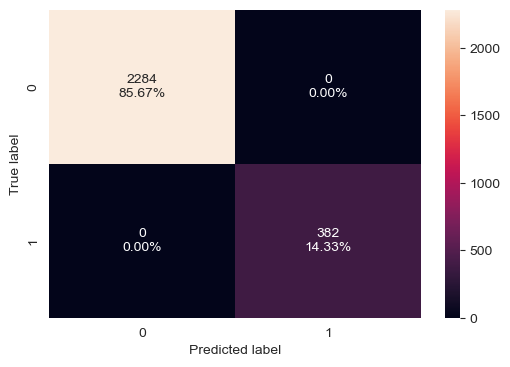

In [40]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [41]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


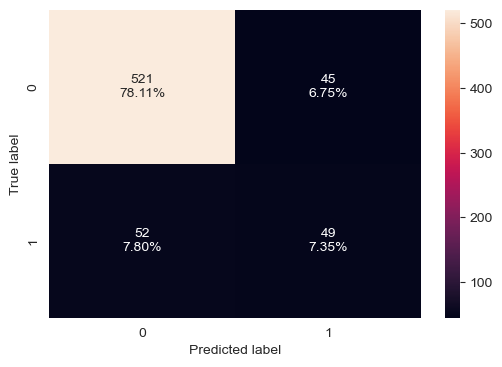

In [42]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [43]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.854573  0.485149   0.521277  0.502564


*  DecisionTreeClassifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

# Bagging Classifier

In [72]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

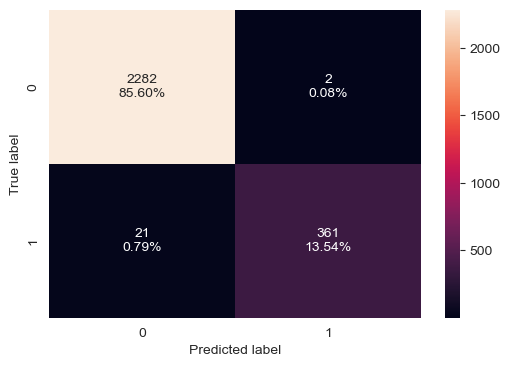

In [73]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [74]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.991373  0.945026    0.99449  0.969128


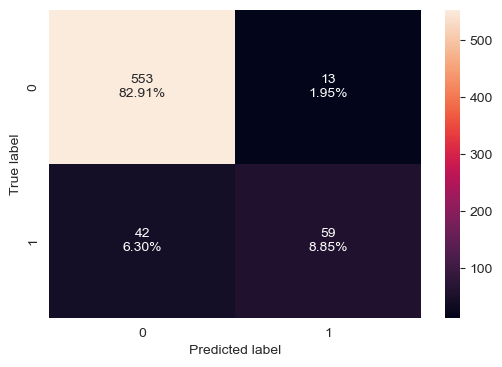

In [75]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [76]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.917541  0.584158   0.819444  0.682081


 * Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

# Bagging Classifier with weighted decision tree

In [77]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

C:\ProgramData\anaconda3\ANACONDA\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

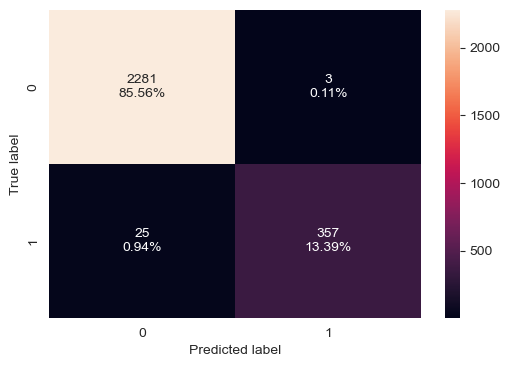

In [78]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [79]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.989497  0.934555   0.991667  0.962264


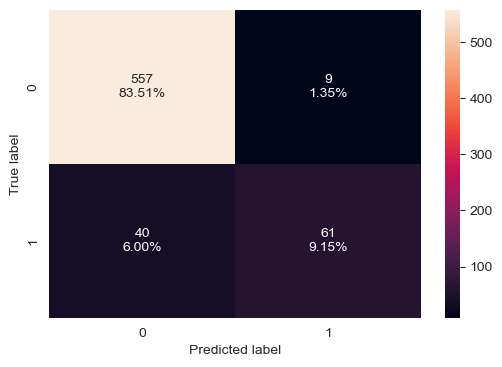

In [80]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [81]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision       F1
0  0.926537  0.60396   0.871429  0.71345


# Random Forest

In [82]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

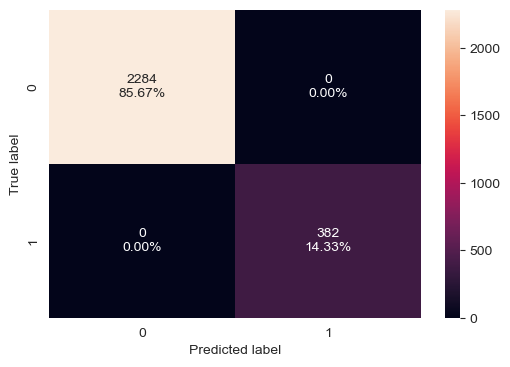

In [83]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [84]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


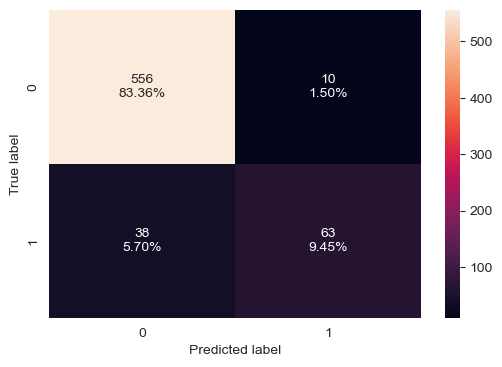

In [85]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [86]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.928036  0.623762   0.863014  0.724138


###Random forest with class weights

In [87]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

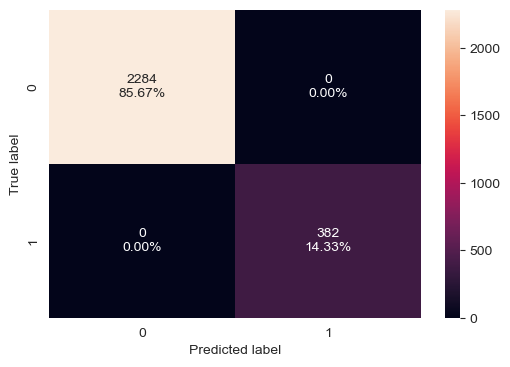

In [88]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [89]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


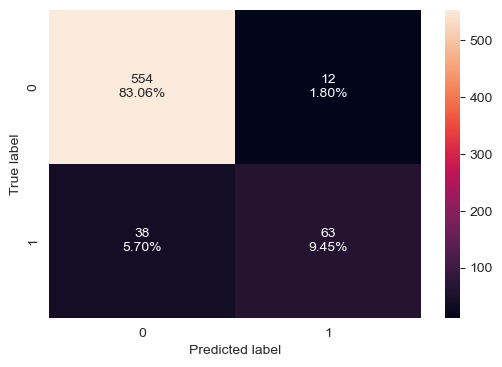

In [90]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [91]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.925037  0.623762       0.84  0.715909


# Adaboost

In [92]:
adaboost_clf = AdaBoostClassifier(estimator=dtree, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
adaboost_clf = adaboost_clf.fit(X_train, y_train)


In [93]:
ab_regressor_model_train = model_performance_classification_sklearn(adaboost_clf, X_train,y_train)
print("Training performance \n",ab_regressor_model_train)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [94]:
ab_regressor_model_test_perf = model_performance_classification_sklearn(adaboost_clf, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.862069  0.524752   0.546392  0.535354


# Gradient Boost

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [96]:
gbcl_train = model_performance_classification_sklearn(gbcl, X_train,y_train)
print("Training performance \n",gbcl_train)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.972993  0.819372   0.990506  0.896848


In [97]:
gbcl_test = model_performance_classification_sklearn(gbcl, X_test,y_test)
print("Testing performance \n",gbcl_test)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.926537  0.643564   0.833333  0.726257


# Comparing all the models

In [98]:
import pandas as pd

In [99]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T, ab_regressor_model_train.T, gbcl_train.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Adaboost Classifier",
    "Gradient Boost Classifier"
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Bagging Classifier  Weighted Bagging Classifier  \
Accuracy             1.0            0.991373                     0.989497   
Recall               1.0            0.945026                     0.934555   
Precision            1.0            0.994490                     0.991667   
F1                   1.0            0.969128                     0.962264   

           Random Forest Classifier  Weighted Random Forest Classifier  \
Accuracy                        1.0                                1.0   
Recall                          1.0                                1.0   
Precision                       1.0                                1.0   
F1                              1.0                                1.0   

           Adaboost Classifier  Gradient Boost Classifier  
Accuracy                   1.0                   0.972993  
Recall                     1.0                   0.819372  
Precision                  1.0                   0.990506  
F1                         1.0                   0.896848

* All the models are overfitting. Among these models Gradient Boost Classifier Should be choose for Feature importance .


In [100]:
# testingg performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T, ab_regressor_model_test_perf.T, gbcl_test.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Adaboost Classifier",
    "Gradient Boost Classifier"
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Bagging Classifier  Weighted Bagging Classifier  \
Accuracy        0.854573            0.917541                     0.926537   
Recall          0.485149            0.584158                     0.603960   
Precision       0.521277            0.819444                     0.871429   
F1              0.502564            0.682081                     0.713450   

           Random Forest Classifier  Weighted Random Forest Classifier  \
Accuracy                   0.928036                           0.925037   
Recall                     0.623762                           0.623762   
Precision                  0.863014                           0.840000   
F1                         0.724138                           0.715909   

           Adaboost Classifier  Gradient Boost Classifier  
Accuracy              0.862069                   0.926537  
Recall                0.524752                   0.643564  
Precision             0.546392                   0.833333  
F1                    0.535354                   0.726257

# Feature importance of Gradient Boost Classifier

In [68]:
#importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Choose the type of classifier.
gbcl = GradientBoostingClassifier(n_estimators = 50, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)
print (pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
DayMins          0.230148
MonthlyCharge    0.190195
CustServCalls    0.148258
OverageFee       0.114416
ContractRenewal  0.101917
RoamMins         0.092035
DataUsage        0.059516
AccountWeeks     0.025845
DataPlan         0.018843
DayCalls         0.018825


In [69]:
feature_names = X_train.columns

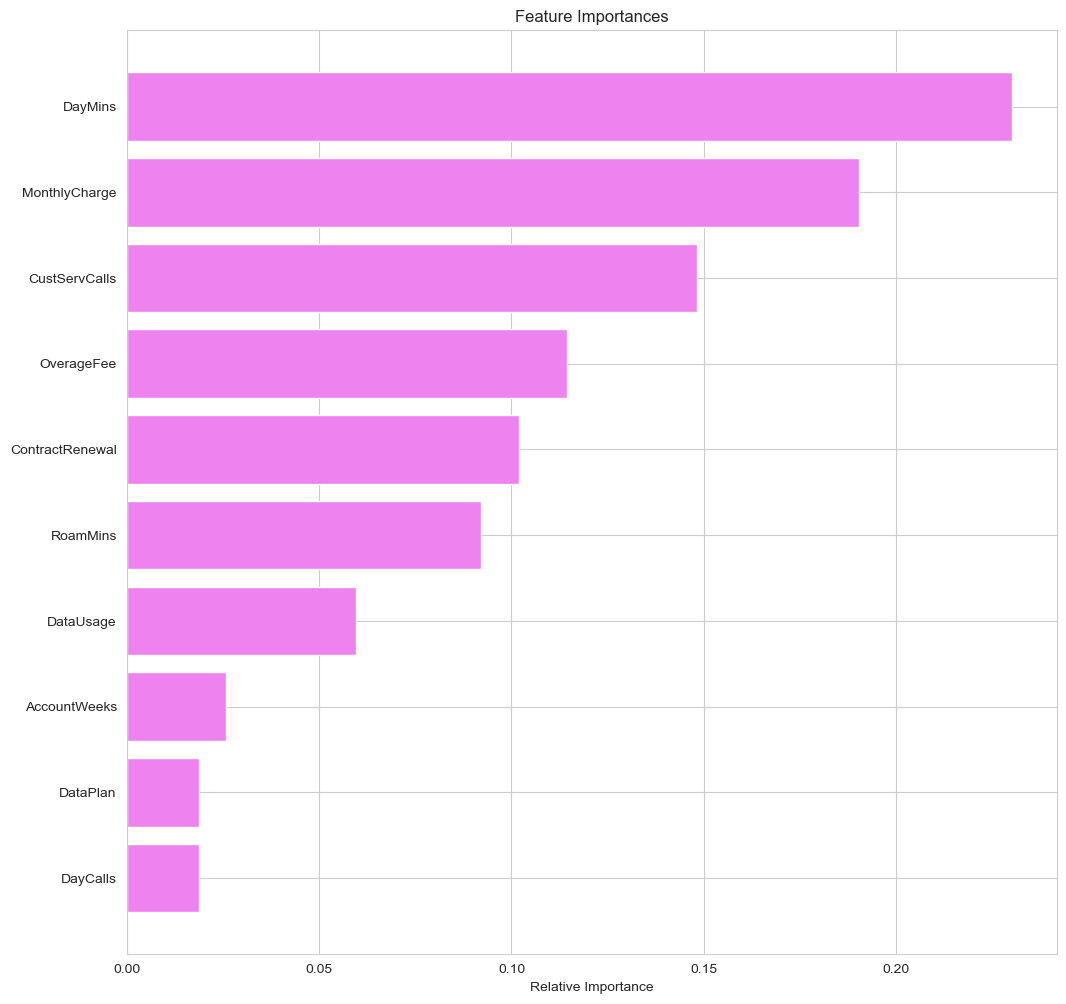

In [70]:
importances = gbcl.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* `Daymins` is the most important feature for prediction followed by `MonthlyCharge`, `CustServCalls`, and `OverageFees`.